In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats, interpolate
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 18})

## 1. Kiểm định bộ dữ liệu (variable, feature) có tuân theo luận phân phối chuẩn hay không?

In [3]:
#data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data = np.random.normal(0, 1, 100)
data

array([ 1.22552494, -1.0811027 ,  0.5626763 , -0.39485056, -0.96620828,
       -0.68727906, -0.54237313,  1.25226146,  0.32249377,  0.81903799,
        0.72881113,  0.59575729, -1.98305983,  1.24784711,  0.32371938,
        1.58591983,  0.31517948, -0.25896855, -0.16799435,  0.07509385,
        1.32491934, -1.84894475,  2.14828821, -0.33005157, -0.72447185,
       -2.10091066,  0.21903471,  0.5832401 ,  0.1513096 ,  0.92492263,
        0.79865334,  0.31568681, -0.83991132, -0.25949413, -0.55698379,
       -0.5927742 , -0.38242741,  1.31417217, -0.62755212, -0.26996332,
        0.08206876, -0.4407762 ,  0.82557426,  1.39756461,  0.73193259,
       -0.23719369,  0.90824355, -0.43037648,  0.31418201,  0.0883599 ,
        0.74701957,  1.23625422,  0.44666338,  0.51742109,  1.67307768,
        0.10030796, -0.57387491, -0.03278148,  0.54247799, -1.06372124,
       -0.21556463,  0.59739298, -0.23042925, -0.0277524 ,  0.0582735 ,
       -1.43421018, -0.25636987, -1.76806773,  2.61462799, -1.62

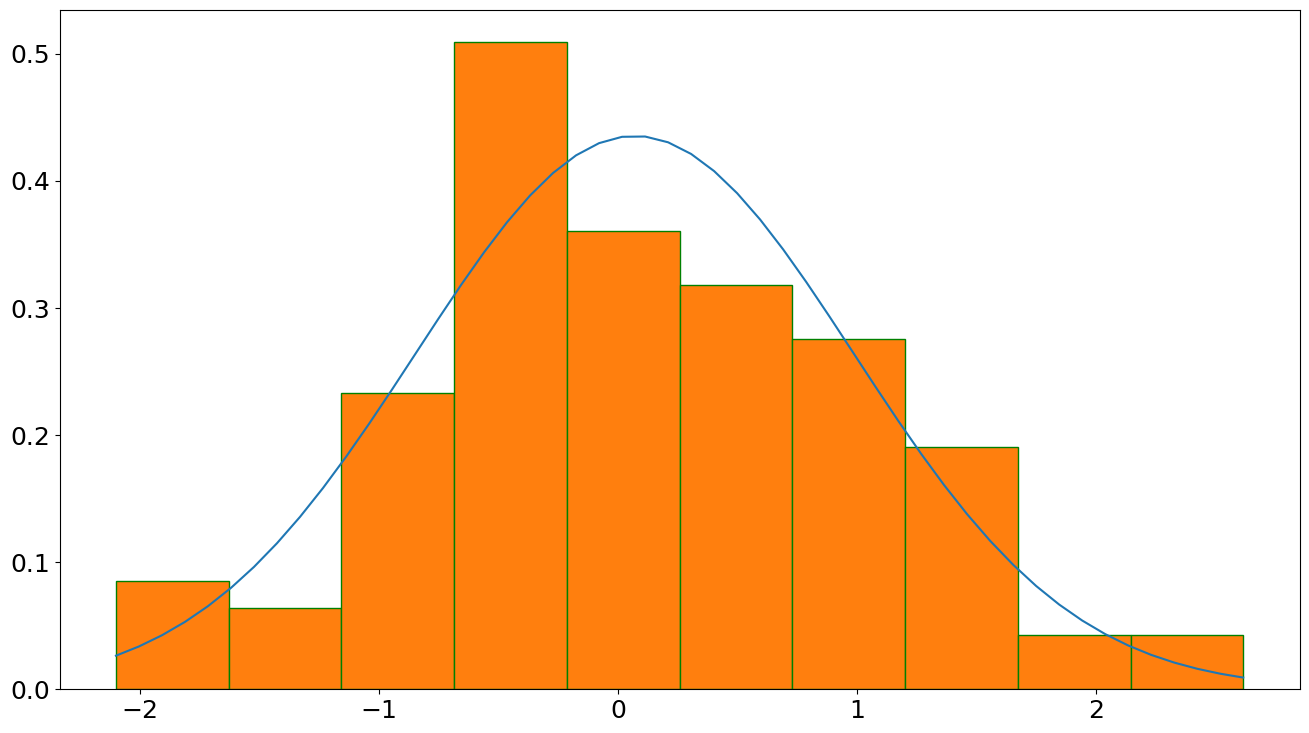

In [4]:
mean = np.mean(data)
# ddof=1 :: hiệu chỉnh
std = np.std(data, ddof=1)
domain = np.linspace(np.min(data), np.max(data))
plt.plot(domain, stats.norm.pdf(domain, mean, std))
#density=True :: chuẩn hóa dữ liệu về normal
plt.hist(data, edgecolor='green', density=True)
plt.show()

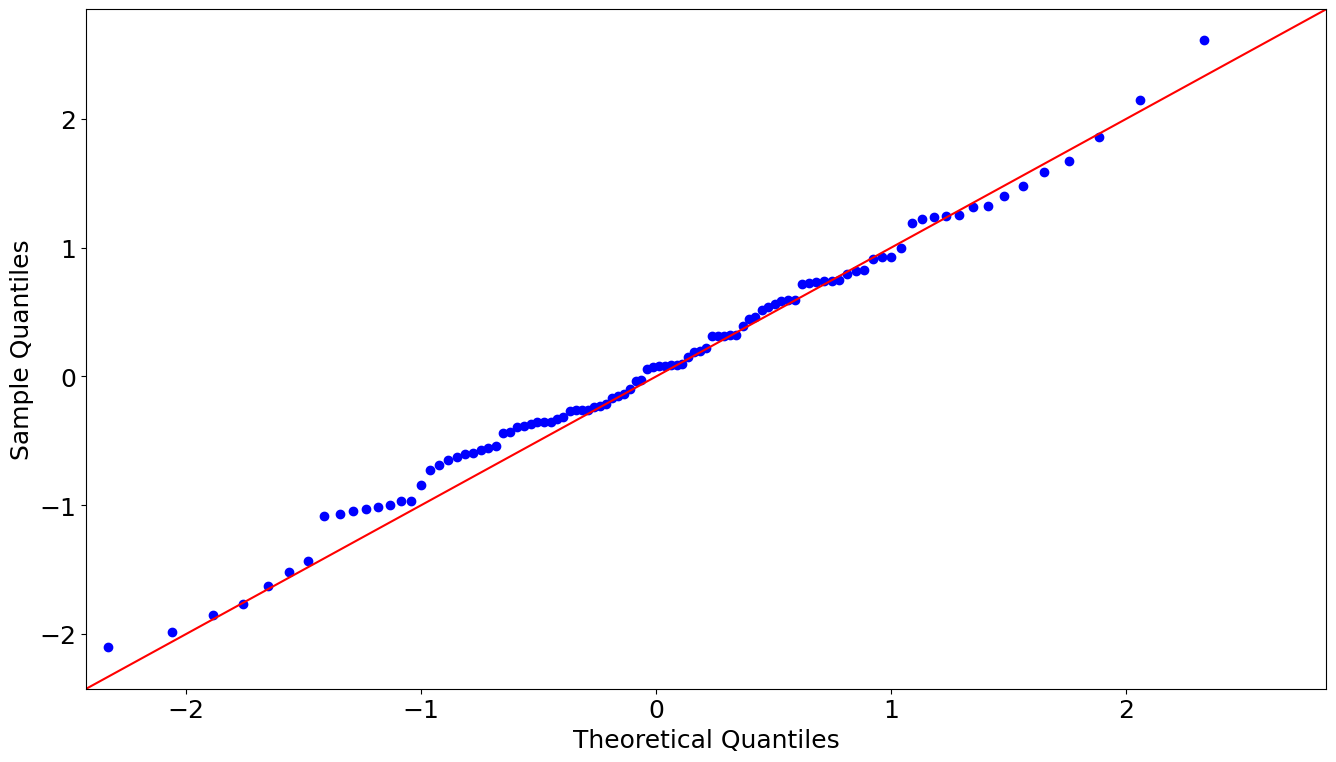

In [5]:
#Sử dụng QQ plot để kiểm tra phân phối có chuẩn hay không?
import statsmodels.api as sm
sm.qqplot(data, line ='45')
plt.show()

Các bước tiếp theo sẽ kiểm tra phân phối chuẩn thông qua các kỹ thuật thống kê (khá chính xác).
### a) Sử dụng kiểm định Shapiro-Wilk

Phát biểu giả thiết:

$H_0$: Phân phối của feature là chuẩn

$H_1$: Phân phối của feature là không chuẩn

In [6]:
from scipy.stats import shapiro
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')

stat=0.994, p=0.937
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn


Chú ý: Chúng ta cần p > 0.05 để kết luận phân phối chuẩn

### b) Sử dụng kiểm định D’Agostino’s K^2


In [7]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')

stat=0.134, p=0.935
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn


### c) Sử dụng kiểm định Anderson-Darling

In [8]:
from scipy.stats import anderson
result = anderson(data)
print(result)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))


AndersonResult(statistic=0.20092267848988854, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
stat=0.201
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


- $\alpha$: mức ý nghĩa, significant level
- $K_tn$: giá trị stats
- $\mu_\frac{\alpha}{2}$: được gọi là giá trị tới hạn (critical_value)
- $p$ value = xác suất $p = P(|X| > K_tn)$ và $\alpha = P(|X| > \mu_\frac{\alpha}{2})$ = 0.05 
- Miền bác bỏ $B_\alpha = (-\infty, -\mu_\frac{\alpha}{2}) \bigcup (\mu_\frac{\alpha}{2}, +\infty)$
- Nếu $K_tn > \mu_\frac{\alpha}{2}$ (giá trị thực nghiệm > giá trị tới hạn) thì bác bỏ $H_0$

### d) Kolmogorov Smirnov test


In [9]:
from scipy.stats import kstest
stat, p = kstest(data, 'norm')
print(stat, p)

0.07968751133975793 0.5232294920823597


### e) Lilliefors test

In [10]:
from statsmodels.stats.diagnostic import lilliefors
lilliefors(data)

(0.04185268966386979, 0.9441388694072199)

## 2. Kiểm định tính thuần nhất của phương sai (homogeneity of variance)

In [11]:
from scipy import stats
import numpy as np
def gen_sample(sigma=3, N=10000):
    x = np.arange(-10, 11)
    xU, xL = x + 0.5, x - 0.5 
    prob = stats.norm.cdf(xU, scale = sigma) - stats.norm.cdf(xL, scale = sigma)
    prob = prob / prob.sum() # normalize the probabilities so their sum is 1
    return np.random.choice(x, size = N, p = prob)

In [12]:
a = gen_sample(3)
b = gen_sample(3)
c = gen_sample(3.2)

In [13]:
c

array([ 2,  6,  0, ..., -5,  2,  2])

### a) Bartlett’s Test
Phát biểu giả thiết:

$H_0$:  Các feature đều có phương sai đồng nhất

$H_1$: Có ít nhất 2 feature có phương sai khác nhau(lớn)

Chú ý: Nếu $p < 0.05 = \alpha$ thì loại giả thiết H0. Tức là các feature không đồng nhất về phương sai.

In [14]:
from scipy.stats import bartlett
stat, p = bartlett(a, b)
print(stat, p)
print(p < 0.05)

0.619819635983113 0.4311143182423164
False


### b) Levene's Test

In [15]:
from scipy.stats import levene
stat, p = levene(a, b)
print(p)
print(p < 0.05)

0.9546224833620713
False


## Thực hành


1. Dùng pandas để đọc file excel (Thầy sẽ gửi ngay)
2. Sử dụng histogram và qq plot để vẽ biểu đồ kiểm tra phân phối chuẩn
3. Sử dụng Shapiro và Kolmogorov để kiểm định chuẩn/hay không chuẩn?
4. Dùng kiểm định Bartlett và Levene để kiểm tra tính thuần nhất của các features.